# Capstone project

This jupyter notebook will be used mainly for the capstone project by Erick Ferrer García

# Table of contents

* [Introduction: Business Problem](#introduction)
* [Data understanding](#data) 
* [Methodology](#methodology)
* [Data Analysis](#analysis)
    * [Overview of the data](#overview)
    * [Cleaning the data](#cleaning)
    * [Modeling](#modeling)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

# Introduction: Business Problem <a name="introduction"></a>

I find a dataset called **'US_Accidents_June20.csv'** that complies some requirements like this:

1. Must have 'severity' as attribute.
2. It's big enough.
3. The main objective of the dataset is predict the severity.


### Main problem

With this dataset i have the data enough, so now defining the problem, is to predict the severity of a car, so we can create a solution given the factors that affect the severity of an accident, this can safe lives, money, insurance and time wasted on accidents.
But first, we have to look if the data is clean, and choose the best method to model the data.

#### Bibliographical citations

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. “A Countrywide Traffic Accident Dataset.”, 2019.

* Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. "Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights." In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

# Data understanding <a name="data"></a>

This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to June 2020, using two APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by a variety of entities, such as the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road-networks. Currently, there are about 3.5 million accident records in this dataset.
So in this project the dataset fits perfect to the objective of the capstone project, which is predict the severity, based on the result we can see how we can improve the roads to make them safer.

Link to the dataset on kaggle: https://www.kaggle.com/sobhanmoosavi/us-accidents

# Methodology <a name="methodology"></a>

In this project our main target is predict the severity of an accident, after finish cleaning the data we have 470,000 entries all from the same state california, so now we have to put the steps of the process to modeling and do predictions.

* First step: We have to collect the required data, that we already have, a dataset about accidents with severity as an attribute, and many others to predict.

* Second step: We  need to clean our data since it have missing entries, or noise like the ID attribute which it doest'n help us to predict, then an analisys of the data that is left will be nice to understand which algorithm is the best to do model and predict.

* Third step: The final step will be to notice areas of improvement, which is what could most affect a serious accident and how to avoid it if possible, have feedback from the project qualifiers, and get to write the conclusions



# Data Analysis <a name="analysis"></a>

### Overview of the data

We can initiate reading the CSV with the pandas librarie

In [1]:
import numpy as np 
import pandas as pd 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
import io
from scipy.stats import boxcox

In [2]:
Filename='US_Accidents_June20.csv'
df = pd.read_csv(Filename)

And we can get some info by the function .info() to see the data type 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3513617 entries, 0 to 3513616
Data columns (total 49 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   TMC                    float64
 3   Severity               int64  
 4   Start_Time             object 
 5   End_Time               object 
 6   Start_Lat              float64
 7   Start_Lng              float64
 8   End_Lat                float64
 9   End_Lng                float64
 10  Distance(mi)           float64
 11  Description            object 
 12  Number                 float64
 13  Street                 object 
 14  Side                   object 
 15  City                   object 
 16  County                 object 
 17  State                  object 
 18  Zipcode                object 
 19  Country                object 
 20  Timezone               object 
 21  Airport_Code           object 
 22  Weather_Timestamp 

However i make a table about the description of the data and what kind of data type is the attribute.

| Attribute  | Description | Data    type |
|  ------    |   ------    |  ------   |
|   ID       | This is a unique identifier of the accident record.                                 |  object |   
|   Source   | Indicates source of the accident report (i.e. the API which reported the accident.) |  object |
|   TMC      | A traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.                                                                          | float64 |
|   Severity       | Shows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay). Note that severity reported by different sources may differ in their underlying impact on traffic, so please separate data from different sources when doing severity-based analysis.        | int64   |
|   Start_Time       | Shows start time of the accident in local time zone.                        | object  |
|   End_Time       | Shows end time of the accident in local time zone. End time here refers to when the impact of accident on traffic flow was dismissed.                                                            | object  |
|   Start_Lat| Shows latitude in GPS coordinate of the start point.                                | float64 |
|   Start_Lng       | Shows longitude in GPS coordinate of the start point.                        | float64 |
|   End_Lat       | Shows latitude in GPS coordinate of the end point.                             | float64 |
|   End_Lng       | Shows longitude in GPS coordinate of the end point.                            | float64 |
|   Distance(mi)       | The length of the road extent affected by the accident.                   | float64 |
|   Description       | Shows natural language description of the accident.                        | object  |
|   Number       | Shows the street number in address record.                                      | float64 |
|   Street     | Shows the street name in address record.                                          | object  |
|   Side     | Shows the relative side of the street (Right/Left) in address record.               | object  |
|   City      | Shows the city in address record.                                                  | object  |    
|   County     | Shows the county in address record.                                               | object  |
|   State       | Shows the state in address record.                                               | object  |
|   Zipcode       | Shows the country in address record.                                           | object  |
|   Timezone       | Shows timezone based on the location of the accident (eastern, central, etc.).| object  |
|   Airport_Code    | Denotes an airport-based weather station which is the closest one to location of the accident.                                                                                          | object  |
|   Weather_Timestamp       | Shows the time-stamp of weather observation record (in local time).  | object  |   |Temperature(F)       | Shows the temperature (in Fahrenheit).                                     | float64 |
|   Wind_Chill(F)       | Shows the wind chill (in Fahrenheit).                                    | float64 |
|   Humidity(%)       | Shows the humidity (in percentage).                                        | float64 |
|   Pressure(in)       | Shows the air pressure (in inches).                                       | float64 |
|   Visibility(mi)       | Shows visibility (in miles).                                            | float64 |
|   Wind_Direction       | Shows wind direction.                                                   | object  |
|   Wind_Speed(mph)       | Shows wind speed (in miles per hour).                                  | float64 |
|   Precipitation(in)       | Shows precipitation amount in inches, if there is any.               | float64 |
|   Weather_Condition       | Shows the weather condition (rain, snow, thunderstorm, fog, etc.)    | object  |
|   Amenity       | A POI annotation which indicates presence of amenity in a nearby location.     | bool    |
|   Bump       | A POI annotation which indicates presence of speed bump or hump in a nearby location.| bool    |
|   Crossing       | A POI annotation which indicates presence of crossing in a nearby location.   | bool    |
|   Give_Way       | A POI annotation which indicates presence of give_way in a nearby location.   | bool    |
|   Junction       | A POI annotation which indicates presence of junction in a nearby location.   | bool    |
|   No_Exit       | A POI annotation which indicates presence of no_exit in a nearby location.     | bool    | 
|   Railway       | A POI annotation which indicates presence of railway in a nearby location.     | bool    |
|   Roundabout       | A POI annotation which indicates presence of roundabout in a nearby location.| bool   |
|   Station       | A POI annotation which indicates presence of station in a nearby location.     | bool    |
|   Stop       | A POI annotation which indicates presence of stop in a nearby location.           | bool    |
|   Traffic_Calming       | A POI annotation which indicates presence of traffic_calming in a nearby location.| bool    |
|   Traffic_Signal       | A POI annotation which indicates presence of traffic_signal in a nearby location. | bool    |
|   Turning_Loop       | A POI annotation which indicates presence of turning_loop in a nearby location.| bool |
|   Sunrise_Sunset       | Shows the period of day (i.e. day or night) based on sunrise/sunset.    | object  |
|   Civil_Twilight       | Shows the period of day (i.e. day or night) based on civil twilight.    | object  |
|   Nautical_Twilight       | Shows the period of day (i.e. day or night) based on nautical twilight. | object  |
|   Astronomical_Twilight       | Shows the period of day (i.e. day or night) based on astronomical twilight.| object  |

And with the function shape let see how many entries we have

In [4]:
print('The size of this data frame is :' , df.shape)

The size of this data frame is : (3513617, 49)


The data came of 2 sources, "Bing" and "MapQuest", they have diferent levels of severity,  Bing with 4 and MapQuest with 5, giving a look at the data and some kaggle post there are some big differences like:

* The overall duration and impacted distance of accidents reported by Bing are much longer than those by MapQuest.

* Second, same severity level holds different meanings for MapQuest and Bing. MapQuest seems to have a clear and strict threshold for severity level 4, cases of which nevertheless only account for a tiny part of the whole dataset. Bing, on the other hand, doesn't seem to have a clear-cut threshold, especially regards duration.

* The data is more balanced in Bing.

Since a lot of people say that we cannot use both i decide choose the MapQuest data, even when is not the most balanced about their cases of severity, i like it since they are more consistent in the handle of the duration and severity.
So we drop where the source is Bing and leave MapQuest.

In [5]:
df = df.loc[df['Source']=="MapQuest",]

df = df.drop(['Source'], axis=1)

### Cleaning the data <a name="cleaning"></a>

Now that we choose where the data is coming from, is needed to say that some attributes are useless for this project, like all the atributes with and 'END' on the name, because the main objective is prevent the accidents, this atributes can be dropped since they don't help us, same with distance.
But they are not the only useless atributes in our data, such atributes like 'ID', 'TMC' or 'Descrition' don't give us a lot of info to prevent an accident, so lets drop all of them.

In [6]:
df = df.drop(['ID','TMC','Description','Distance(mi)',
              'End_Time','End_Lat', 'End_Lng'], axis=1)

Now let check the categorical attributes 

In [7]:
Categorical_A = ['Side', 'Country', 'Timezone', 'Amenity', 'Bump', 'Crossing', 
             'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 
             'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 
             'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']

print("Unique count of categorical features:")

for i in Categorical_A:
  print(i,df[i].unique().size)

Unique count of categorical features:
Side 3
Country 1
Timezone 5
Amenity 2
Bump 2
Crossing 2
Give_Way 2
Junction 2
No_Exit 2
Railway 2
Roundabout 2
Station 2
Stop 2
Traffic_Calming 2
Traffic_Signal 2
Turning_Loop 1
Sunrise_Sunset 3
Civil_Twilight 3
Nautical_Twilight 3
Astronomical_Twilight 3


As we can see the Country and Turning_Loop it's just 1 so we can drop them too

In [8]:
df = df.drop(['Country','Turning_Loop'], axis=1)

### Dealing with categorical attributes

I read in kaggle that 2 problems in this part are the Wind_Direction and Weather_condition, lets see why

In [9]:
print("Wind Direction: ", df['Wind_Direction'].unique())

Wind Direction:  ['Calm' 'SW' 'SSW' 'WSW' 'WNW' 'NW' 'West' 'NNW' 'NNE' 'South' 'North'
 'Variable' 'SE' 'SSE' 'ESE' 'East' 'NE' 'ENE' 'E' 'W' nan 'S' 'VAR'
 'CALM' 'N']


In [10]:
# show distinctive weather conditions 

weather ='!'.join(df['Weather_Condition'].dropna().unique().tolist())

weather = np.unique(np.array(re.split(
    "!|\s/\s|\sand\s|\swith\s|Partly\s|Mostly\s|Blowing\s|Freezing\s",
    weather))).tolist()

print("Weather Conditions: ", weather)

Weather Conditions:  ['', 'Clear', 'Cloudy', 'Drizzle', 'Dust', 'Dust Whirlwinds', 'Fair', 'Fog', 'Funnel Cloud', 'Hail', 'Haze', 'Heavy ', 'Heavy Drizzle', 'Heavy Ice Pellets', 'Heavy Rain', 'Heavy Rain Showers', 'Heavy Sleet', 'Heavy Smoke', 'Heavy Snow', 'Heavy T-Storm', 'Heavy Thunderstorms', 'Ice Pellets', 'Light ', 'Light Drizzle', 'Light Fog', 'Light Hail', 'Light Haze', 'Light Ice Pellets', 'Light Rain', 'Light Rain Shower', 'Light Rain Showers', 'Light Sleet', 'Light Snow', 'Light Snow Grains', 'Light Snow Shower', 'Light Snow Showers', 'Light Thunderstorm', 'Light Thunderstorms', 'Low Drifting Snow', 'Mist', 'N/A Precipitation', 'Overcast', 'Partial Fog', 'Patches of Fog', 'Rain', 'Rain Shower', 'Rain Showers', 'Sand', 'Scattered Clouds', 'Shallow Fog', 'Showers in the Vicinity', 'Sleet', 'Small Hail', 'Smoke', 'Snow', 'Snow Grains', 'Snow Showers', 'Squalls', 'T-Storm', 'Thunder', 'Thunder in the Vicinity', 'Thunderstorm', 'Thunderstorms', 'Tornado', 'Volcanic Ash', 'Widespr

As we can observate there is a mess in this 2 categorical variables so lets simplify both, tho a better handle of the data 

* First the Wind_Direction.

In [11]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['CALM' 'SW' 'S' 'W' 'NW' 'N' 'VAR' 'SE' 'E' 'NE' nan]


* Second the Wind_Direction by blend some of them, like Cloud and Overcast, or Rain and Storm.

In [12]:
df['Clear'] = np.where(df['Weather_Condition'].str.contains('Clear', case=False, na = False), 1, 0)
df['Cloud'] = np.where(df['Weather_Condition'].str.contains('Cloud|Overcast', case=False, na = False), 1, 0)
df['Rain'] = np.where(df['Weather_Condition'].str.contains('Rain|storm', case=False, na = False), 1, 0)
df['Heavy_Rain'] = np.where(df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms', case=False, na = False), 1, 0)
df['Snow'] = np.where(df['Weather_Condition'].str.contains('Snow|Sleet|Ice', case=False, na = False), 1, 0)
df['Heavy_Snow'] = np.where(df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls', case=False, na = False), 1, 0)
df['Fog'] = np.where(df['Weather_Condition'].str.contains('Fog', case=False, na = False), 1, 0)

# Assign NA to created weather features where 'Weather_Condition' is null.

weather = ['Clear','Cloud','Rain','Heavy_Rain','Snow','Heavy_Snow','Fog']
for i in weather:
  df.loc[df['Weather_Condition'].isnull(),i] = df.loc[df['Weather_Condition'].isnull(),'Weather_Condition']

df.loc[:,['Weather_Condition'] + weather]

df = df.drop(['Weather_Condition'], axis=1)

### Now let's fix the Datetime format

Since Start_Time and Weather_Timestamp are very similar we can drop one to simplify the process.

In [13]:
df = df.drop(["Weather_Timestamp"], axis=1)

Now we can map year 'Start_Time' to 'Year', 'Month', 'Weekday', 'Day' (in a year), 'Hour', and 'Minute' (in a day).

In [14]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

df['Year'] = df['Start_Time'].dt.year

nmonth = df['Start_Time'].dt.month

df['Month'] = nmonth

df['Weekday']= df['Start_Time'].dt.weekday

days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))

nday = [days_each_month[arg-1] for arg in nmonth.values]

nday = nday + df["Start_Time"].dt.day.values

df['Day'] = nday

df['Hour'] = df['Start_Time'].dt.hour

df['Minute']=df['Hour']*60.0+df["Start_Time"].dt.minute

df.loc[:4,['Start_Time', 'Year', 'Month', 'Weekday', 'Day', 'Hour', 'Minute']]

,Start_Time,Year,Month,Weekday,Day,Hour,Minute
0,2016-02-08 05:46:00,2016,2,0,39,5,346.0
1,2016-02-08 06:07:59,2016,2,0,39,6,367.0
2,2016-02-08 06:49:27,2016,2,0,39,6,409.0
3,2016-02-08 07:23:34,2016,2,0,39,7,443.0
4,2016-02-08 07:39:07,2016,2,0,39,7,459.0


### Handling missing data

Lets calculate the percentage of missing data in each atribute

In [15]:
MissingDf = pd.DataFrame(df.isnull().sum()).reset_index()
MissingDf.columns = ['Feature', 'Missing_Percent(%)']
MissingDf['Missing_Percent(%)'] = MissingDf['Missing_Percent(%)'].apply(lambda x: x / df.shape[0] * 100)
MissingDf.loc[MissingDf['Missing_Percent(%)']>0,:]

,Feature,Missing_Percent(%)
4,Number,59.879195
7,City,0.002071
10,Zipcode,0.012840
11,Timezone,0.085366
12,Airport_Code,0.170857
13,Temperature(F),1.634138
14,Wind_Chill(F),58.718072
15,Humidity(%),1.742119
16,Pressure(in),1.404009
17,Visibility(mi),1.969680


As we saw in the course we have two options one is drop the data and the other option is replace it, since number is the number of the street we can't replace because the mean and etc... don't help here, lets drop it

In [16]:
df = df.drop(['Number'], axis=1)

Now by a previus research i can notice that wind chill doesn't matter a lot in the result and there is a lot of missing data, otherwise precipitation matter in the result even when there's 62% of missing data, so just drop wind chill for now

In [17]:
df = df.drop(['Wind_Chill(F)'], axis=1)

Let's handle precipitation by taking the mean and add it like another feature

In [18]:
df['Precipitation_NA'] = 0
df.loc[df['Precipitation(in)'].isnull(),'Precipitation_NA'] = 1
df['Precipitation(in)'] = df['Precipitation(in)'].fillna(df['Precipitation(in)'].median())
df.loc[:5,['Precipitation(in)','Precipitation_NA']]

,Precipitation(in),Precipitation_NA
0,0.02,0
1,0.00,0
2,0.00,1
3,0.00,1
4,0.00,1
5,0.03,0


Now we will drop the little data that is lost in other features, since  it isn't a lot

In [19]:
df.head(1)

,Severity,Start_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,Zipcode,...,Snow,Heavy_Snow,Fog,Year,Month,Weekday,Day,Hour,Minute,Precipitation_NA
0,3,2016-02-08 05:46:00,39.865147,-84.058723,I-70 E,R,Dayton,Montgomery,OH,45424,...,0,0,0,2016,2,0,39,5,346.0,0


In [20]:
df = df.dropna(subset=['City','Zipcode','Timezone','Airport_Code',
                       'Wind_Direction','Sunrise_Sunset',
                       'Civil_Twilight','Nautical_Twilight',
                       'Astronomical_Twilight',])

In [21]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with median value
Weather_data=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']
print("The number of remaining missing values: ")
for i in Weather_data:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(x.median()))
  print( i + " : " + df[i].isnull().sum().astype(str))

The number of remaining missing values: 


/usr/local/Cellar/jupyterlab/2.1.5/libexec/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Temperature(F) : 35
Humidity(%) : 59
Pressure(in) : 9
Visibility(mi) : 4454
Wind_Speed(mph) : 4534


In [22]:
df = df.dropna(subset=Weather_data)

In [23]:
# group data by 'Airport_Code' and 'Start_Month' then fill NAs with majority value
from collections import Counter
weather_cat = ['Wind_Direction'] + weather
print("Count of missing values that will be dropped: ")
for i in weather_cat:
  df[i] = df.groupby(['Airport_Code','Month'])[i].apply(lambda x: x.fillna(Counter(x).most_common()[0][0]) if all(x.isnull())==False else x)
  print(i + " : " + df[i].isnull().sum().astype(str))

# drop na
df = df.dropna(subset=weather_cat)

Count of missing values that will be dropped: 
Wind_Direction : 0
Clear : 5110
Cloud : 5591
Rain : 5273
Heavy_Rain : 4954
Snow : 4956
Heavy_Snow : 4952
Fog : 4952


Now with our data clean we can procedure to understand do it an exploration of the data

## Exploring the data

As mention before this data is unbalanced which mean we can't deal with it or even analyse easily we can see it like this:

In [24]:
df['Severity4'] = 0
df.loc[df['Severity'] == 4, 'Severity4'] = 1
df.Severity4.value_counts()

0    2363158
1       6562
Name: Severity4, dtype: int64

To address this issue, the combination of over- and under-sampling will be used since the dataset is large enough.

In [25]:
df = df.drop(['Severity'], axis = 1)
df_bl = pd.concat([df[df['Severity4']==1].sample(100000, replace = True),
                   df[df['Severity4']==0].sample(100000)], axis=0)
print('resampled data:', df_bl.Severity4.value_counts())

resampled data: 1    100000
0    100000
Name: Severity4, dtype: int64


### Year plot

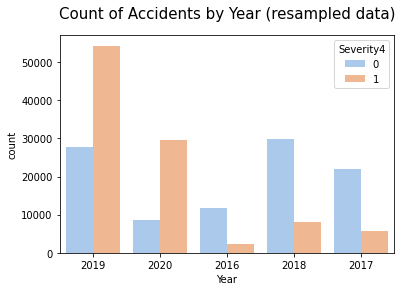

In [26]:
df_bl.Year = df_bl.Year.astype(str)
sns.countplot(x='Year', hue='Severity4', data=df_bl ,palette="pastel")
plt.title('Count of Accidents by Year (resampled data)', size=15, y=1.05)
plt.show()

In the research of this data set i see that MapQuest may change the  parameters to calatog the severy of the accident, so lets fix this part by take out that part of the dataset, and resamble, because the data is still unbalance after this.

In [27]:
df = df.loc[(df['Year']==2019) & (df['Month']!=1) & (df['Month']!=2),:]
df = df.drop(['Year', 'Start_Time'], axis=1)

df['Severity4'].value_counts()

0    541158
1      3468
Name: Severity4, dtype: int64

In [28]:
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

### Month plot

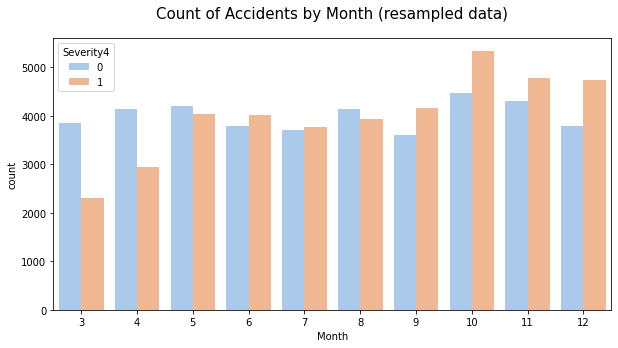

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(x='Month', hue='Severity4', data=df_bl ,palette="pastel")
plt.title('Count of Accidents by Month (resampled data)', size=15, y=1.05)
plt.show()

As we can see it's interesting how the first 2 months of the years are the least accidental and the last 3 months the most.


### Day plot

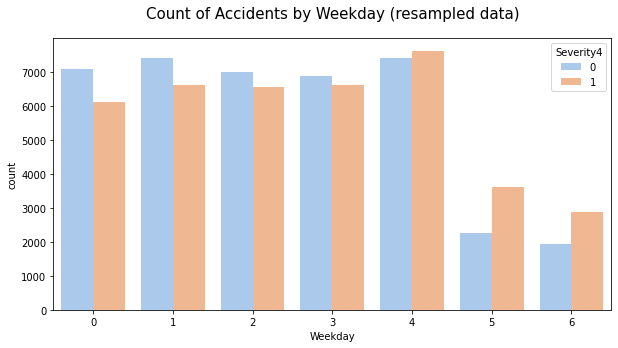

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Weekday', hue='Severity4', data=df_bl ,palette="pastel")
plt.title('Count of Accidents by Weekday (resampled data)', size=15, y=1.05)
plt.show()

Before this i will said that the weekends are the most accidentals but they are not.

### Hour

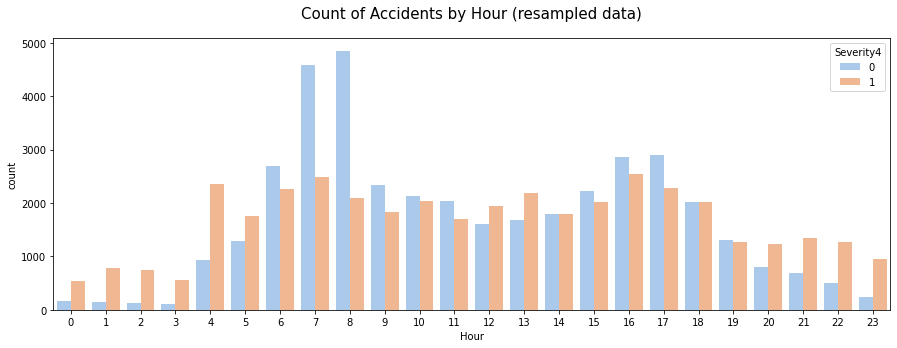

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(x='Hour', hue='Severity4', data=df_bl ,palette="pastel")
plt.title('Count of Accidents by Hour (resampled data)', size=15, y=1.05)
plt.show()

I think the hour with more accidents is when the people is going to the workplace or school, but in the night happend with more severity

### State

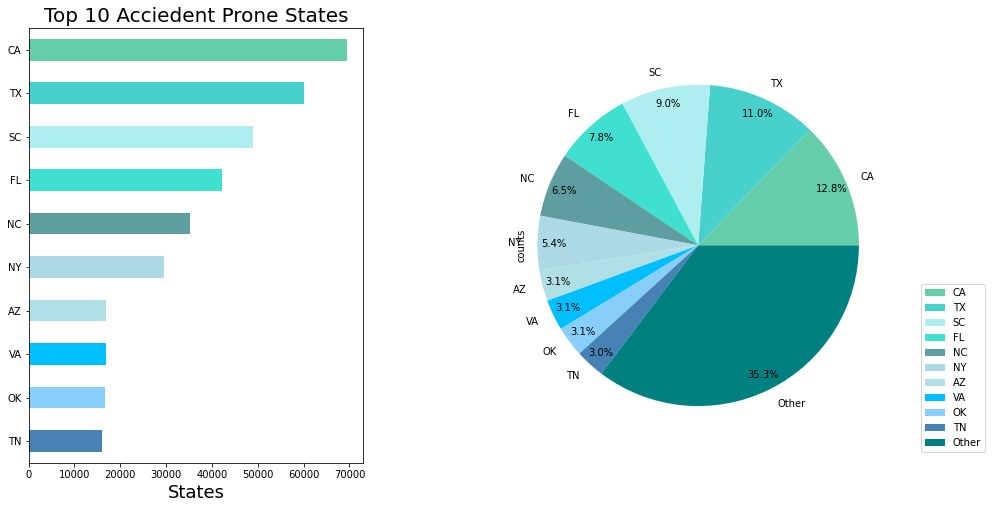

In [32]:
fig,ax=plt.subplots(1,2,figsize=(15,8))
clr = ('steelblue', 'lightskyblue', 'deepskyblue', 'powderblue', 'lightblue','cadetblue','turquoise','paleturquoise','mediumturquoise','mediumaquamarine')
df.State.value_counts().sort_values(ascending=False)[:10].sort_values().plot(kind='barh',color=clr,ax=ax[0])
ax[0].set_title("Top 10 Acciedent Prone States",size=20)
ax[0].set_xlabel('States',size=18)


count=df['State'].value_counts()
groups=list(df['State'].value_counts().index)[:10]
counts=list(count[:10])
counts.append(count.agg(sum)-count[:10].agg('sum'))
groups.append('Other')
type_dict=pd.DataFrame({"group":groups,"counts":counts})
clr1=('mediumaquamarine','mediumturquoise','paleturquoise','turquoise','cadetblue','lightblue','powderblue','deepskyblue','lightskyblue','steelblue','teal')
qx = type_dict.plot(kind='pie', y='counts', labels=groups,colors=clr1,autopct='%1.1f%%', pctdistance=0.9, radius=1.2,ax=ax[1])
plt.legend(loc=0, bbox_to_anchor=(1.15,0.4)) 
plt.subplots_adjust(wspace =0.5, hspace =0)
plt.ioff()

Now we can see the top 3 states with more accidents that are CA, TX and SC no matter the severity

### County

We can't handle the countys as states so for this part we're going to make a census data instead and see the results

In [33]:
import censusdata

# download data

county = censusdata.download('acs5', 2018, censusdata.censusgeo([('county', '*')]),
                                   ['DP05_0001E',  'DP03_0019PE','DP03_0021PE','DP03_0022PE','DP03_0062E'],
                                   tabletype='profile')

# rename columns
county.columns = ['Population_County','Drive_County','Transit_County','Walk_County','MedianHouseholdIncome_County']
county = county.reset_index()

# extract county name and convert them to lowercase
county['County_y'] = county['index'].apply(lambda x : x.name.split(' County')[0].split(',')[0]).str.lower()

In [34]:
# convert all county name to lowercase 
df['County'] = df['County'].str.lower()

# left join df with census data
df = df.merge(county, left_on = 'County', right_on='County_y',how = 'left').drop('County_y', axis = 1)
join_var = county.columns.to_list()[:-1]

# check how many miss match we got
print('Count of missing values before: ', df[join_var].isnull().sum())

# add "city" and match again
df_city = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_city['County_city'] = df_city['County'].apply(lambda x : x + ' city')
df_city = df_city.merge(county,left_on= 'County_city',right_on = 'County_y', how = 'left').drop(['County_city','County_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_city), axis=0)

# add "parish" and match again
df_parish = df[df['Walk_County'].isnull()].drop(join_var, axis=1)
df_parish['County_parish'] = df_parish['County'].apply(lambda x : x + ' parish')
df_parish = df_parish.merge(county,left_on= 'County_parish',right_on = 'County_y', how = 'left').drop(['County_parish','County_y'], axis=1)
df = pd.concat((df[df['Walk_County'].isnull()==False], df_parish), axis=0)
print('Count of missing values after: ', df[join_var].isnull().sum())

Count of missing values before:  index                           17466
Population_County               17466
Drive_County                    17466
Transit_County                  17466
Walk_County                     17466
MedianHouseholdIncome_County    17466
dtype: int64
Count of missing values after:  index                           5112
Population_County               5112
Drive_County                    5112
Transit_County                  5112
Walk_County                     5112
MedianHouseholdIncome_County    5112
dtype: int64


Drop the NaN values

In [35]:
# drop na
df = df.drop('index', axis = 1).dropna()

# log-transform
for i in ['Population_County','Transit_County','Walk_County']:
    df[i + '_log'] = df[i].apply(lambda x: np.log(x+1))
df = df.drop(['Population_County','Transit_County','Walk_County'], axis = 1)

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)


### Streets

In [36]:
# create a list of top 40 most common words in street name
st_type =' '.join(df['Street'].unique().tolist()) # flat the array of street name
st_type = re.split(" |-", st_type) # split the long string by space and hyphen
st_type = [x[0] for x in Counter(st_type).most_common(40)] # select the 40 most common words
print('the 40 most common words')
print(*st_type, sep = ", ") 

the 40 most common words
Rd, St, Dr, Ave, N, S, E, W, Blvd, Ln, Highway, Pkwy, Hwy, Way, SW, NE, NW, Ct, State, Old, Pl, SE, Road, US, Creek, Cir, Park, Hill, Route, Lake, County, I, Trl, Valley, Ridge, Mill, Pike, Fwy, River, Oak


As the speed limits are highly related to street type, street type hence can be a good predictor of serious accidents, but our data need a cleaning of all the irrelevants words, lets see the correlation to severity and drop the least importans  

In [37]:
# Remove some irrelevant words and add spaces and hyphen back
st_type= [' Rd', ' St', ' Dr', ' Ave', ' Blvd', ' Ln', ' Highway', ' Pkwy', ' Hwy', 
          ' Way', ' Ct', 'Pl', ' Road', 'US-', 'Creek', ' Cir', 'Hill', 'Route', 
          'I-', 'Trl', 'Valley', 'Ridge', 'Pike', ' Fwy', 'River']
print(*st_type, sep = ", ")  

 Rd,  St,  Dr,  Ave,  Blvd,  Ln,  Highway,  Pkwy,  Hwy,  Way,  Ct, Pl,  Road, US-, Creek,  Cir, Hill, Route, I-, Trl, Valley, Ridge, Pike,  Fwy, River


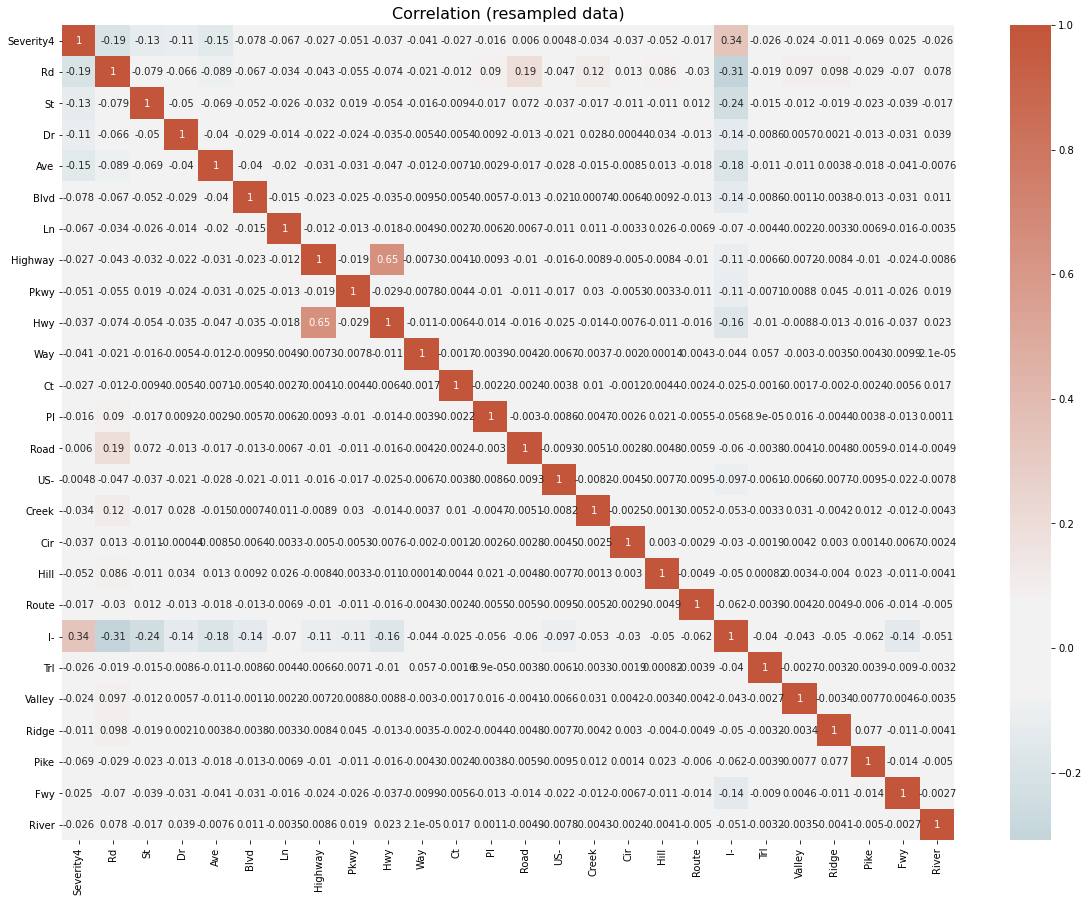

In [38]:
# for each word create a boolean column
for i in st_type:
  df[i.strip()] = np.where(df['Street'].str.contains(i, case=True, na = False), 1, 0)
df.loc[df['Road']==1,'Rd'] = 1
df.loc[df['Highway']==1,'Hwy'] = 1

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

# plot correlation
df_bl['Severity4'] = df_bl['Severity4'].astype(int)
street_corr  = df_bl.loc[:,['Severity4']+[x.strip() for x in st_type]].corr()
plt.figure(figsize=(20,15))
cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(street_corr, annot=True, cmap=cmap, center=0).set_title("Correlation (resampled data)", fontsize=16)
plt.show()

Lets keep the top 5 most dangerous street types for this analysis

In [39]:
drop_list = street_corr.index[street_corr['Severity4'].abs()<0.1].to_list()
df = df.drop(drop_list, axis=1)

# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

### Side 

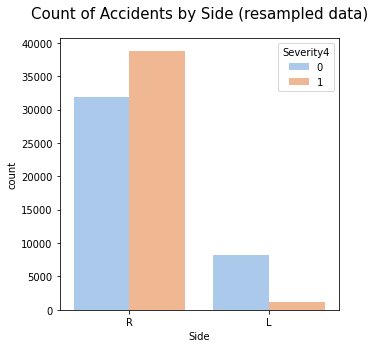

In [40]:
plt.figure(figsize=(5,5))
chart = sns.countplot(x='Side', hue='Severity4', data=df_bl ,palette="pastel")
plt.title("Count of Accidents by Side (resampled data)", size=15, y=1.05)
plt.show()

As we can see the right side is more dangerous

### Frequency

Similar to 'Minute', some location features like 'City' and 'Zipcode' that have too many unique values can be labeled by their frequency. Frequency encoding and log-transform:

* 'Street'
* 'City'
* 'County'
* 'Zipcode'
* 'Airport_Code'

In [41]:
fre_list = ['Street', 'City', 'County', 'Zipcode', 'Airport_Code']
for i in fre_list:
  newname = i + '_Freq'
  df[newname] = df.groupby([i])[i].transform('count')
  df[newname] = df[newname]/df.shape[0]*df[i].unique().size
  df[newname] = df[newname].apply(lambda x: np.log(x+1))

In [42]:
# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

Now drop the feature we don't need

In [43]:
df = df.drop(fre_list, axis  = 1)

### Weather Features

Let's normalizate our data

In [44]:
df['Pressure_bc']= boxcox(df['Pressure(in)'].apply(lambda x: x+1),lmbda=6)
df['Visibility_bc']= boxcox(df['Visibility(mi)'].apply(lambda x: x+1),lmbda = 0.1)
df['Wind_Speed_bc']= boxcox(df['Wind_Speed(mph)'].apply(lambda x: x+1),lmbda=-0.2)
df = df.drop(['Pressure(in)','Visibility(mi)','Wind_Speed(mph)'], axis=1)

In [45]:
# resample again
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

df_bl['Severity4'] = df_bl['Severity4'].astype('category')
num_features = ['Temperature(F)', 'Humidity(%)', 'Pressure_bc', 'Visibility_bc', 'Wind_Speed_bc']

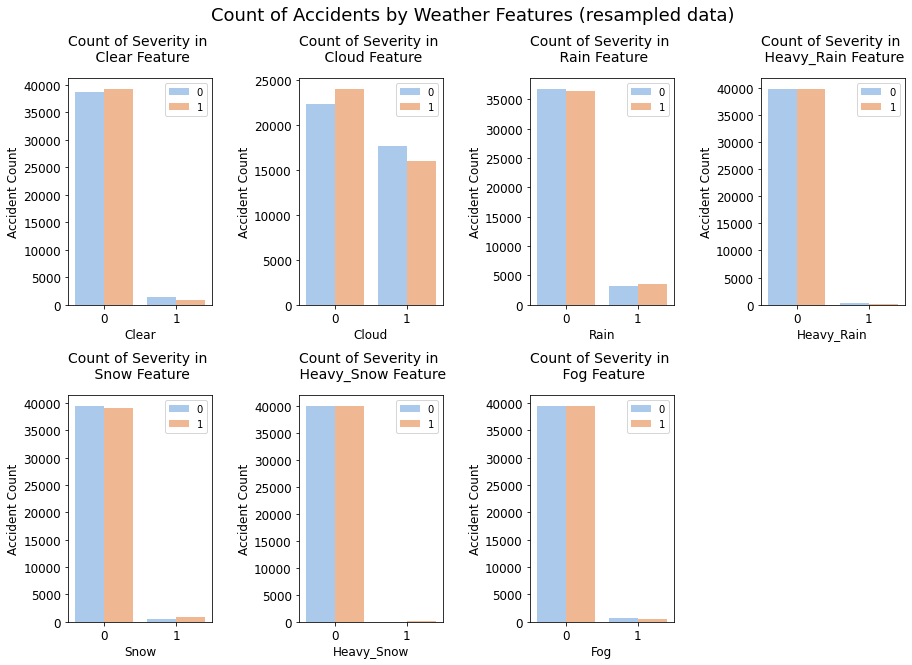

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4,wspace = 0.6)
for i, feature in enumerate(weather, 1):    
    plt.subplot(2, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="pastel")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in \n {} Feature'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents by Weather Features (resampled data)', fontsize=18)
plt.show()

As we can see most accidents happen with snow or fog in the weather

### POI Features

Now Talking of the POI Features i believe they don't have a impact of the severity but let's see

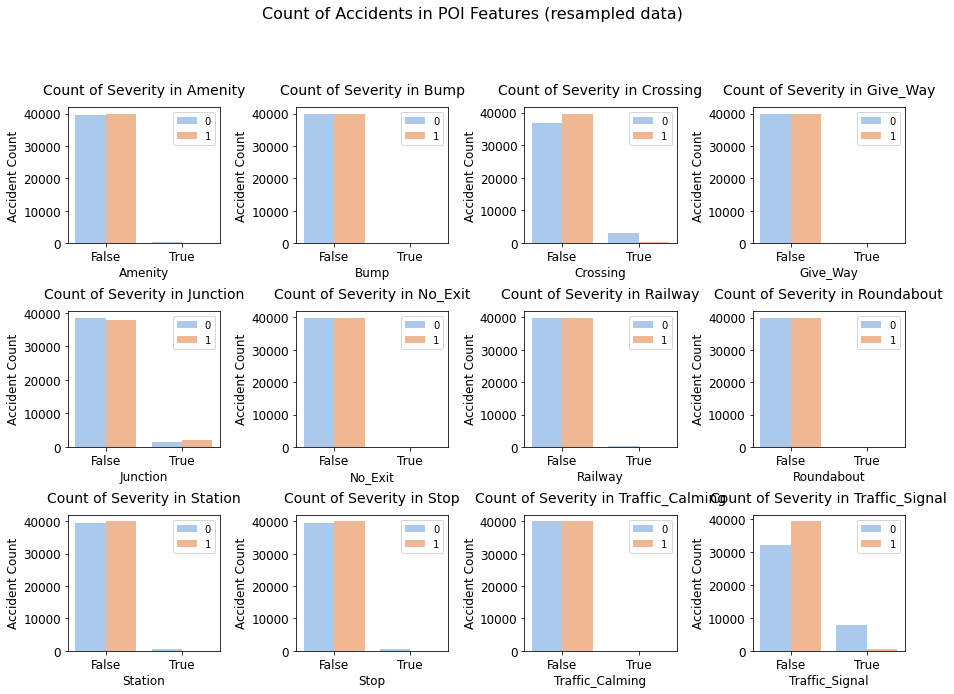

In [47]:
POI_features = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal']

fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(15, 10))

plt.subplots_adjust(hspace=0.5,wspace = 0.5)
for i, feature in enumerate(POI_features, 1):    
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, hue='Severity4', data=df_bl ,palette="pastel")
    
    plt.xlabel('{}'.format(feature), size=12, labelpad=3)
    plt.ylabel('Accident Count', size=12, labelpad=3)    
    plt.tick_params(axis='x', labelsize=12)
    plt.tick_params(axis='y', labelsize=12)
    
    plt.legend(['0', '1'], loc='upper right', prop={'size': 10})
    plt.title('Count of Severity in {}'.format(feature), size=14, y=1.05)
fig.suptitle('Count of Accidents in POI Features (resampled data)',y=1.02, fontsize=16)
plt.show()

Now we can see that my opinion was wrong because high severity accidents happen more often around the signals, anyways let drop the unbalanced features.

In [48]:
df = df.drop(['Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming'], axis=1)

In [49]:
df = df.drop(['Day','Minute','Population_County_log','City_Freq','Side'], axis=1)

In [50]:
df = df.drop(['Sunrise_Sunset','Civil_Twilight','Nautical_Twilight','Astronomical_Twilight'], axis=1)

In [51]:
df.head(10)

,Start_Lat,Start_Lng,State,Timezone,Temperature(F),Humidity(%),Wind_Direction,Precipitation(in),Amenity,Crossing,...,Dr,Ave,I-,Street_Freq,County_Freq,Zipcode_Freq,Airport_Code_Freq,Pressure_bc,Visibility_bc,Wind_Speed_bc
0,40.884850,-95.800362,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.394777,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
1,40.884850,-95.800362,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.394777,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
2,40.884850,-95.800362,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.394777,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
3,40.884850,-95.800362,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.394777,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
4,40.889641,-95.798630,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.050239,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
5,40.889641,-95.798630,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.050239,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
6,40.889641,-95.798630,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.050239,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
7,40.889641,-95.798630,IA,US/Central,31.0,85.0,CALM,0.0,False,False,...,0,0,1,3.050239,0.133128,1.695814,0.108945,1.176635e+08,2.709816,0.000000
8,42.313499,-83.091225,MI,US/Eastern,28.0,92.0,W,0.0,False,False,...,0,0,0,0.709744,3.587636,3.765103,3.302560,1.229653e+08,2.311444,2.050527
9,42.313499,-83.091225,MI,US/Eastern,28.0,92.0,W,0.0,False,False,...,0,0,0,0.709744,3.587636,3.765103,3.302560,1.229653e+08,2.311444,2.050527


In [52]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006937 entries, 0 to 15897
Data columns (total 43 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Start_Lat                     float64
 1   Start_Lng                     float64
 2   State                         object 
 3   Timezone                      object 
 4   Temperature(F)                float64
 5   Humidity(%)                   float64
 6   Wind_Direction                object 
 7   Precipitation(in)             float64
 8   Amenity                       bool   
 9   Crossing                      bool   
 10  Junction                      bool   
 11  Railway                       bool   
 12  Station                       bool   
 13  Stop                          bool   
 14  Traffic_Signal                bool   
 15  Clear                         object 
 16  Cloud                         object 
 17  Rain                          object 
 18  Heavy_Rain              

### One hot encoding

Now we realize one hot encoding on the categorical features

In [53]:
df = df.replace([True, False], [1,0])

cat = ['State','Timezone','Wind_Direction','Weekday', 'Month', 'Hour']
df[cat] = df[cat].astype('category')
df = pd.get_dummies(df, columns=cat, drop_first=True)

df.head(10)

,Start_Lat,Start_Lng,Temperature(F),Humidity(%),Precipitation(in),Amenity,Crossing,Junction,Railway,Station,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,40.884850,-95.800362,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,40.889641,-95.798630,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,40.889641,-95.798630,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,40.889641,-95.798630,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,40.889641,-95.798630,31.0,85.0,0.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,42.313499,-83.091225,28.0,92.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,42.313499,-83.091225,28.0,92.0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


And we are ready to do the modeling

## Modeling <a name="modeling"></a>

Now let go with the modeling, since its labeled data we have 2 options:

* Classification: predict a class or a discrete value
* Regression: predictr a continous value

So lets choose classification, since severity is a discrete value, and we have 3 algorithims to do it KNN, logistic regression and decision tree, but KNN dont work with this kind of values and converting entries like the street to int isn't the best practice of all,so with this in mind lets start with spliting the data.

In [54]:
#resample again

DfTrain = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)

### Decision tree 

**import the librarys**

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

**Split the data**

In [56]:
# resample again so the data will be more balanced
df_bl = pd.concat([df[df['Severity4']==1].sample(40000, replace = True), 
                   df[df['Severity4']==0].sample(40000)], axis=0)


# split X, y
X = df_bl.drop('Severity4', axis=1)

In [57]:
#Our label
y= df_bl['Severity4']

In [58]:
# Standardizing also we can do a preprocessing 
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(X)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

**Training**

First we need to create the Decision Tree object

In [60]:
AccidentTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
AccidentTree

DecisionTreeClassifier(criterion='entropy', max_depth=6)

Next, we will fit the data with the training set

In [61]:
AccidentTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

**Predicting**

In [62]:
Yhat = AccidentTree.predict(X_test)

In [63]:
print (Yhat [0:5])
print (y_test [0:5])

[0 0 0 0 0]
919208     0
185883     0
193083     0
651354     0
1805330    0
Name: Severity4, dtype: int64


**Evaluation**

In [64]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [65]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, Yhat))

DecisionTrees's Accuracy:  0.7556666666666667


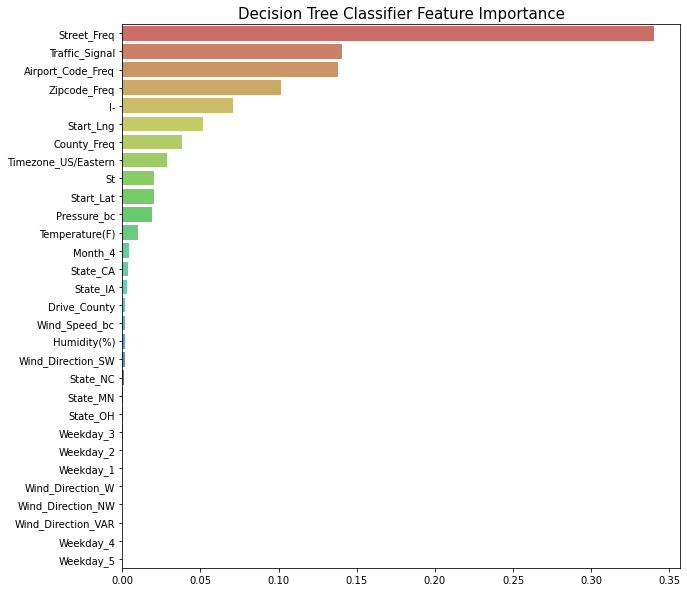

In [66]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=['importance'], 
                           index=df.drop('Severity4',axis=1).columns)

importances.iloc[:,0] = AccidentTree.feature_importances_

importances.sort_values(by='importance', inplace=True, ascending=False)
importances30 = importances.head(30)

plt.figure(figsize=(10, 10))
sns.barplot(x='importance', y=importances30.index, data=importances30,palette="hls")

plt.xlabel('')
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Decision Tree Classifier Feature Importance', size=15)

plt.show()

In [67]:
from sklearn import tree

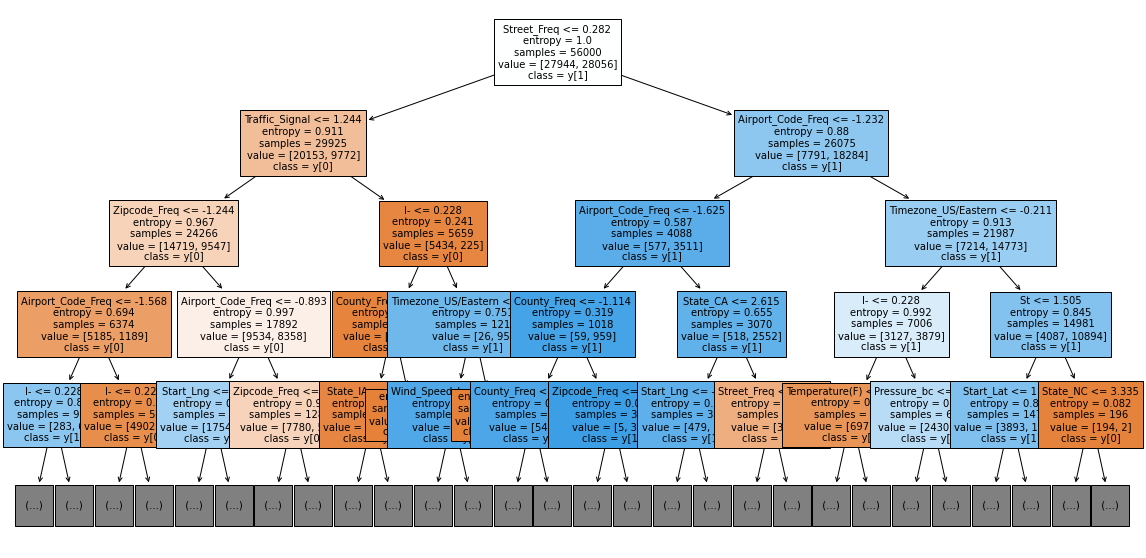

In [68]:
fig, ax = plt.subplots(figsize=(20, 10))
tree.plot_tree(AccidentTree, max_depth=4, fontsize=10,
               feature_names=df.drop('Severity4',axis =1).columns.to_list(),
               class_names = True, filled=True)
plt.show()

### Accuracity

In [69]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, Yhat, labels=[1,0]))

[[9449 2495]
 [3369 8687]]


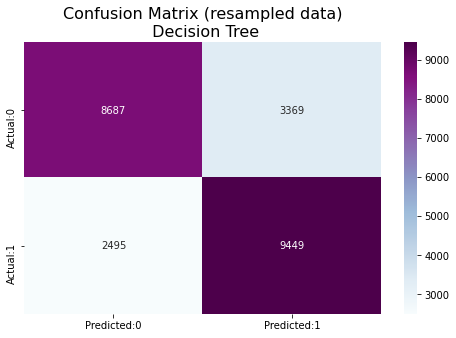

In [70]:
confmat = confusion_matrix(y_true=y_test, y_pred=Yhat)

conf_matrix = pd.DataFrame(data=confmat,
                           columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="BuPu").set_title(
    "Confusion Matrix (resampled data)\n Decision Tree", fontsize=16)
plt.show()

In [71]:
print (classification_report(y_test, Yhat))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75     12056
           1       0.74      0.79      0.76     11944

    accuracy                           0.76     24000
   macro avg       0.76      0.76      0.76     24000
weighted avg       0.76      0.76      0.76     24000



### KNN

**Import Libraries**

In [72]:
from sklearn.neighbors import KNeighborsClassifier

**Training**

Ks = 5
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

Using this algorithim i considere is a bad idea since it's based on distances  and basically we just have 2, that's the why on the plot there's a fall on 2 to 3, also the process is too slow.

### Logistic regression

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [74]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [75]:
yhat = LR.predict(X_test)
yhat

array([1, 0, 0, ..., 1, 1, 1])

In [76]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.46713439, 0.53286561],
       [0.59077897, 0.40922103],
       [0.69713208, 0.30286792],
       ...,
       [0.33671385, 0.66328615],
       [0.0388463 , 0.9611537 ],
       [0.32000445, 0.67999555]])

### Accuracity

In [77]:
from sklearn.metrics import confusion_matrix

Confusion matrix, without normalization
[[9612 2332]
 [3156 8900]]


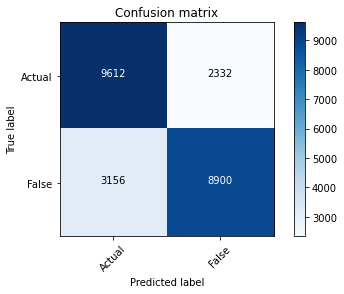

In [78]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Actual','False'],normalize= False,  title='Confusion matrix')

In [79]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76     12056
           1       0.75      0.80      0.78     11944

    accuracy                           0.77     24000
   macro avg       0.77      0.77      0.77     24000
weighted avg       0.77      0.77      0.77     24000



# Results  <a name="results"></a>

As we can see both os them are almost the same, but in this process i will choose decision tree, because it give me more information such as the top 5 features with most impact of an accident like: 

* The street frequency
* Airport code
* Traffic signal
* Zipcode
* The kind of street in this case I

So for now, i decide stay with decision tree algorithim, the logistic regression was algo a good algorhitm but the information that i can plot about it is less graphic, and the result was almost the same as the decision tree, now on the KNN i already said that i don't think is a good algorithim for this case because even when we normalize the data the result about the best K is still 1, this and the time to process the algorithim give reasons to avoid it. 

# Conclusion  <a name="conclusion"></a>

For now i'm going to choose the decision tree for the prediction, and with such info about it, we can implement in a real time system that can prevent this accidents or at least their severity, based on the most important variables, or based on the plots we can say that they happend more often in the morning when people go to work, but the severity of an accident is worst in the night, this information can help also in the logistic of transit police
so they can give more importance to busy streets, at certain times and near certain places, however this proyect by itseft can get better, so maybe improve the relations of the variables will be too a future work and  we can predict better based on it.